In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as stat
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# An Institution wishes to find out their student’s ability in mathematics, reading and writing skills. The Institution wants to do an exploratory study to check the following information

# 1. Find out how many males and females participated in the test.

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
total_count=df['gender'].count()
print('No of males and females participated in the test:',total_count)

No of males and females participated in the test: 1000


In [5]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

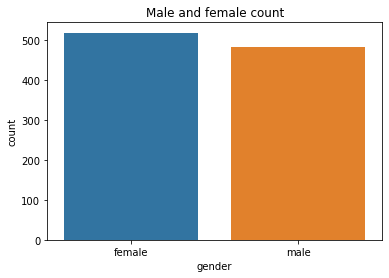

In [6]:
sns.countplot(df['gender']);
plt.title('Male and female count');
plt.show()

# Insights
Total students-1000, Number of Males-482, Number of females-518.

# 2. What do you think about the students' parental level of education?

In [7]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [8]:
pe=df["parental level of education"].value_counts(normalize=True)*100
pe

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

In [22]:
edu=['some college','associates degree','high school','some high school','bachelors degree','masters degree']
edu

['some college',
 'associates degree',
 'high school',
 'some high school',
 'bachelors degree',
 'masters degree']

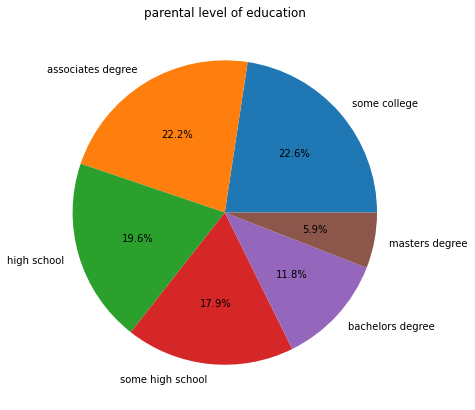

In [23]:
fig=plt.figure(figsize=(10,7))
plt.pie(pe,labels=edu,autopct='%.1f%%');
plt.title('parental level of education');

# Insights
From the dataset, It is clear that only few students parents have degree and master's degree level of education and the rest of the parents did not have a degree or master's and they are more in numbers.The students who have scored above average or good marks are the children of parents with master's degree, bachelor's,some college and associate degree.

# 3. Who scores the most on average for math, reading and writing based on

# Gender

# Test preparation course

In [11]:
# Based on gender
avg_gender=df.groupby('gender').mean()
avg_gender

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


# Insights
In math- males scored more,in reading females scored more and in writing also females scored more.So from dataset it is clear that males scored more in maths than females whereas females scored more in reading and writing when compared to males.

In [12]:
#Based on Test preparation course
avg_testprep=df.groupby('test preparation course').mean()
avg_testprep

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


# Insights
Those who have completed the test preparation course have scored more than those who did no test preparation course.

# 4. What do you think about the scoring variation for math, reading and writing based on

# Gender

# Test preparation course

In [13]:
#Based on gender
dev1=df.groupby('gender').std()
dev1

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


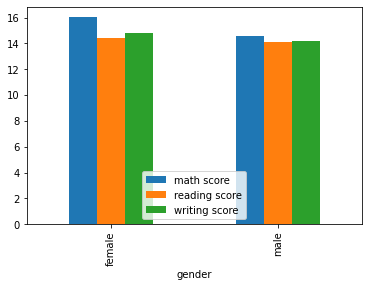

In [14]:
dev1[['math score','reading score','writing score']].plot(kind='bar');

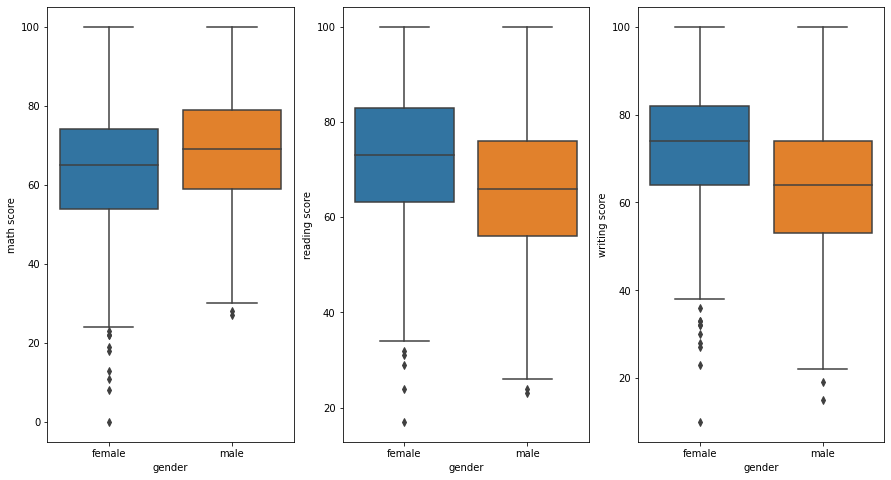

In [15]:
fig=plt.subplots(figsize=(15,8))
plt.subplot(1,3,1)
sns.boxplot(x='gender',y='math score',data=df)
plt.subplot(1,3,2)
sns.boxplot(x='gender',y='reading score',data=df)
plt.subplot(1,3,3)
sns.boxplot(x='gender',y='writing score',data=df)

plt.show()

# Insights
Males show less deviation than the females in the dataset in math score. But they both show almost same deviation in writing and reading scores.

In [16]:
#Based on test preparation course
dev2=df.groupby('test preparation course').std()
dev2

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


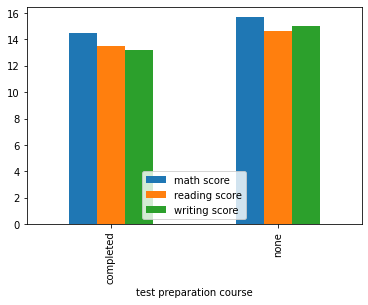

In [17]:
dev2[['math score','reading score','writing score']].plot(kind='bar');

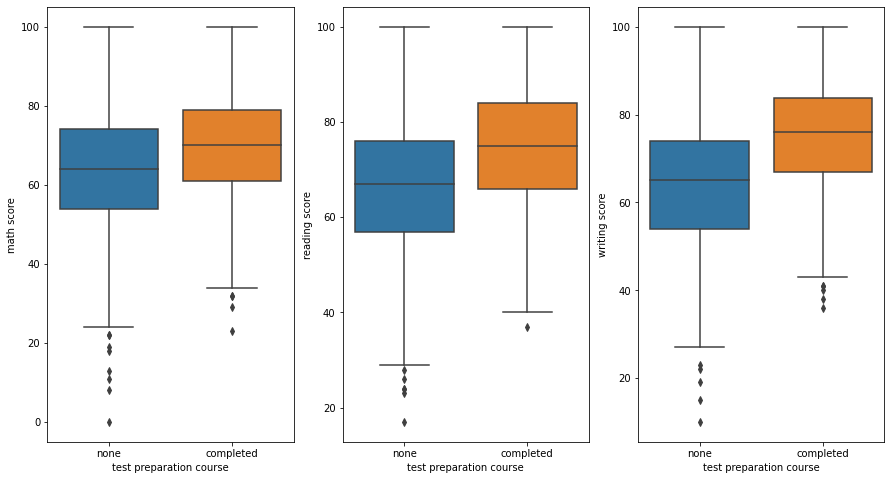

In [18]:
fig=plt.subplots(figsize=(15,8))
plt.subplot(1,3,1)
sns.boxplot(x='test preparation course',y='math score',data=df)
plt.subplot(1,3,2)
sns.boxplot(x='test preparation course',y='reading score',data=df)
plt.subplot(1,3,3)
sns.boxplot(x='test preparation course',y='writing score',data=df)

plt.show()

# Insights
From the dataset, it is clear that those who completed the test preparation course shows less deviation than those who have not completed any preparation course for math,reading and writing.

# 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.001,15.569567,0.0,57.0,66.0,77.00,100.0
reading score,1000.0,69.195,14.706436,17.0,59.0,70.0,79.25,100.0
writing score,1000.0,68.119,15.226381,10.0,58.0,69.0,79.00,100.0


In [20]:
df['math score'].quantile(0.75)

77.0

In [21]:
top=df['math score']>=77
df[top].tail(250)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
419,female,group C,bachelor's degree,standard,none,77,88,87
420,female,group C,bachelor's degree,standard,completed,77,94,95
421,female,group C,some college,free/reduced,none,77,90,91
422,female,group C,some high school,standard,completed,77,90,85
423,female,group C,some high school,standard,none,77,91,88
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


# Insights
The above given data shows the top 250 students in math score who can be considered for bonus points.